In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import pandas as pd
import os
from config import root
import matplotlib.cm as cm


In [2]:
files = [
    "clr2_replication.nii.gz",
    "loc1_replication.nii.gz",
    "loc2_replication.nii.gz",
]

zstat_orig = os.path.join(root, "data", "output", "pop_decay_mixed_fx", "10", "_fixedflameo0", "zstat1.nii.gz")
mni_path = os.path.join(root, "data", "in_analysis", "nii", "standard", "MNI152_T1_2mm.nii.gz")

In [3]:
red = np.array([255, 0, 0, 255], dtype=np.uint8)
blue = np.array([0, 0, 255, 255], dtype=np.uint8)
mni_brain = nib.load(mni_path).get_data()

def slice_img(img, index=60, axis=0, size=(91, 91)):
    slice_ = [slice(None), slice(None), slice(None)]
    slice_[axis] = index
    img = img[slice_]
    rw, rh = img.shape
    w, h = size
    hr = rh - h
    wr = rw - w    
    l = int(np.floor(0+(wr / 2)))
    r = int(np.ceil(w+(wr / 2)))
    u = int(np.floor(0+(hr / 2)))
    d = int(np.ceil(h+(hr / 2)))
    
    if axis == 0:
        return img[l:r, d:u:-1].T
    elif axis == 1:
        return img[l:r, d:u:-1].T
    else:
        return img[l:r, u:d]

def show_slices(ax, slices=None, base=mni_brain, index=60, axis=2, size=(91, 91)):
    
    base_img = slice_img(base, index, axis, size)
    ax.imshow(base_img, cmap="gray")
    
    for name, s in slices.items():
        img = slice_img(s["image"], index, axis, size)
        img = img / img.max()
        img = np.tile(img.reshape((*img.shape, 1)), reps=4) * s["color"]
        img[:,:,3] = (img[:,:,3] > 0).astype(int) * 255
        ax.imshow(img.astype(np.uint8))
        ax.set_title(name)

## Color lag 1 replication

In [4]:
zstat_path = os.path.join(root, "data", "output", "postprocessing", "clr1_replication.nii.gz")
rois_path = os.path.join(root, "data", "output", "postprocessing", "clr_replication_rois.nii.gz")

In [5]:
zstat = nib.load(zstat_path).get_data() * -1
masked_zstat = np.ma.masked_where(zstat > -1, zstat)

rois = nib.load(rois_path).get_data() > 0
rois *= nib.load(zstat_orig).get_data() > 0
rois = rois.astype(int)

In [6]:
slices = {
    "kristjansson-2007": {
        "image": rois,
        "color" : blue,
    },
    "color-lag1": {
        "image" : zstat,
        "color" : red,
    }
}

/home/neuro/.conda/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


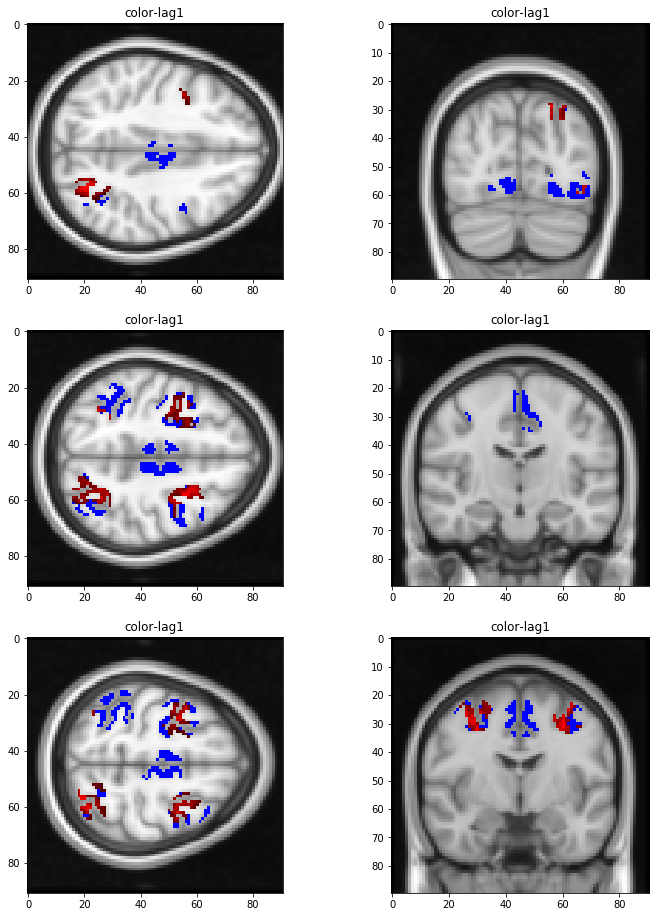

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,16))

show_slices(axes[0][0], slices, index=56, axis=2)
show_slices(axes[1][0], slices, index=60, axis=2)
show_slices(axes[2][0], slices, index=64, axis=2)

show_slices(axes[0][1], slices, index=25, axis=1)
show_slices(axes[1][1], slices, index=55, axis=1)
show_slices(axes[2][1], slices, index=60, axis=1)

## Color lag 2 replication

In [120]:
zstat_path = os.path.join(root, "data", "output", "postprocessing", "clr2_replication.nii.gz")
rois_path = os.path.join(root, "data", "output", "postprocessing", "clr_replication_rois.nii.gz")

In [121]:
zstat = nib.load(zstat_path).get_data() * -1

rois = nib.load(rois_path).get_data() > 0
rois *= nib.load(zstat_orig).get_data() > 0
rois = rois.astype(int)

In [122]:
slices = {
    "kristjansson-2007": {
        "image": rois,
        "color" : blue,
    },
    "color-lag1": {
        "image" : zstat,
        "color" : red,
    }
}

/home/neuro/.conda/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


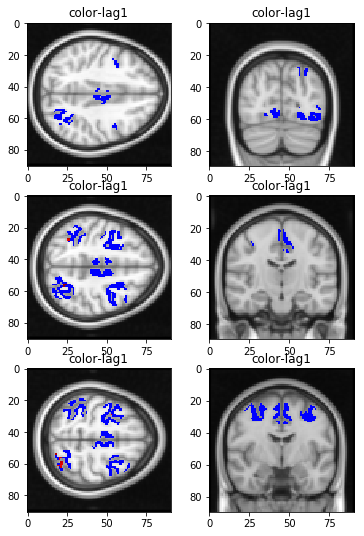

In [123]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 9))

show_slices(axes[0][0], slices, index=56, axis=2)
show_slices(axes[1][0], slices, index=60, axis=2)
show_slices(axes[2][0], slices, index=64, axis=2)

show_slices(axes[0][1], slices, index=25, axis=1)
show_slices(axes[1][1], slices, index=55, axis=1)
show_slices(axes[2][1], slices, index=60, axis=1)

## Location lag 1 replication

In [124]:
zstat_path = os.path.join(root, "data", "output", "postprocessing", "loc1_replication.nii.gz")
rois_path = os.path.join(root, "data", "output", "postprocessing", "loc_replication_rois.nii.gz")

In [125]:
zstat = nib.load(zstat_path).get_data() * -1

rois = nib.load(rois_path).get_data() > 0
rois *= nib.load(zstat_orig).get_data() > 0
rois = rois.astype(int)

In [126]:
slices = {
    "kristjansson-2007": {
        "image": rois,
        "color" : blue,
    },
    "loc-lag1": {
        "image" : zstat,
        "color" : red,
    }
}

/home/neuro/.conda/neuro/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


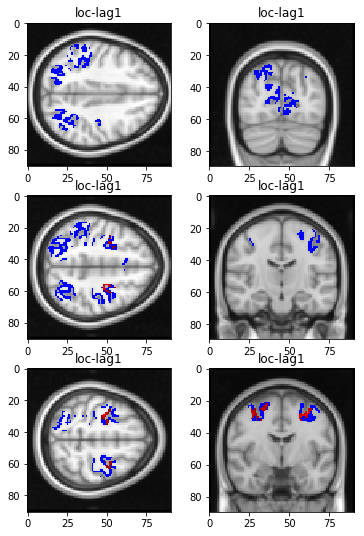

In [127]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 9))

show_slices(axes[0][0], slices, index=56, axis=2)
show_slices(axes[1][0], slices, index=60, axis=2)
show_slices(axes[2][0], slices, index=64, axis=2)

show_slices(axes[0][1], slices, index=25, axis=1)
show_slices(axes[1][1], slices, index=55, axis=1)
show_slices(axes[2][1], slices, index=60, axis=1)

## Location lag 2 replication

In [128]:
zstat_path = os.path.join(root, "data", "output", "postprocessing", "loc2_replication.nii.gz")
rois_path = os.path.join(root, "data", "output", "postprocessing", "loc_replication_rois.nii.gz")

In [129]:
zstat = nib.load(zstat_path).get_data() * -1

rois = nib.load(rois_path).get_data() > 0
rois *= nib.load(zstat_orig).get_data() > 0
rois = rois.astype(int)

In [130]:
slices = {
    "kristjansson-2007": {
        "image": rois,
        "color" : blue,
    },
    "loc-lag1": {
        "image" : zstat,
        "color" : red,
    }
}

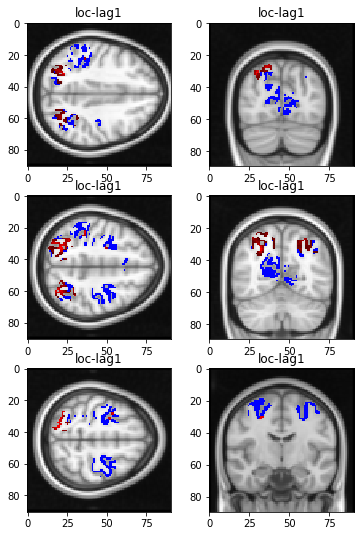

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(6, 9))

show_slices(axes[0][0], slices, index=56, axis=2)
show_slices(axes[1][0], slices, index=60, axis=2)
show_slices(axes[2][0], slices, index=64, axis=2)

show_slices(axes[0][1], slices, index=25, axis=1)
show_slices(axes[1][1], slices, index=32, axis=1)
show_slices(axes[2][1], slices, index=58, axis=1)